<a href="https://colab.research.google.com/github/Dansah2/Udacity_Tutorials/blob/main/Udacity_NLP_Text_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import string
import numpy as np
import pandas as pd

In [2]:
# get the data
!wget --no-check-certificate \
    https://drive.google.com/uc?id=1LiJFZd41ofrWoBtW-pMYsfz1w8Ny0Bj8 \
    -O /tmp/songdata.csv

--2023-07-06 16:36:12--  https://drive.google.com/uc?id=1LiJFZd41ofrWoBtW-pMYsfz1w8Ny0Bj8
Resolving drive.google.com (drive.google.com)... 108.177.127.102, 108.177.127.138, 108.177.127.139, ...
Connecting to drive.google.com (drive.google.com)|108.177.127.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0fpl67v353vi32tou3khhicl4739cmcv/1688661375000/11118900490791463723/*/1LiJFZd41ofrWoBtW-pMYsfz1w8Ny0Bj8?uuid=f936b38d-d6c3-447c-82f0-6c62b9decfca [following]
--2023-07-06 16:36:15--  https://doc-04-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0fpl67v353vi32tou3khhicl4739cmcv/1688661375000/11118900490791463723/*/1LiJFZd41ofrWoBtW-pMYsfz1w8Ny0Bj8?uuid=f936b38d-d6c3-447c-82f0-6c62b9decfca
Resolving doc-04-ak-docs.googleusercontent.com (doc-04-ak-docs.googleusercontent.com)... 108.177.126.132, 2a00:1450:4013:c01::84
Connecting to d

In [3]:
# create functions to tokenize the lyrics, remove punctuation and make everyting lowercase
def tokenize_corpus(corpus, num_words=-1):
  # fit tokenizer to the corpus
  if num_words > -1:
    tokenizer = Tokenizer(num_words=num_words)
  else:
    tokenizer = Tokenizer()
  tokenizer.fit_on_texts(corpus)
  return tokenizer

def create_lyrics_corpus(dataset, field):
  # remove punctuation
  dataset[field] = dataset[field].str.replace('[{}]'.format(string.punctuation), '')

  # convert to lowercase
  dataset[field] = dataset[field].str.lower()

  # create one long string split by line
  lyrics = dataset[field].str.cat()
  corpus = lyrics.split('\n')

  # remove any trailing whitespace
  for l in range(len(corpus)):
    corpus[l] = corpus[l].rstrip()

  # remove empty lines
  corpus = [l for l in corpus if l != '']

  return corpus

In [4]:
# read the first 10 songs from the dataset
dataset = pd.read_csv('/tmp/songdata.csv', dtype=str)[:10]

# create the corpus using the 'text column containing the lyrics
corpus = create_lyrics_corpus(dataset, 'text')

# tokenize the corpus
tokenizer = tokenize_corpus(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'you': 1, 'i': 2, 'and': 3, 'a': 4, 'me': 5, 'the': 6, 'is': 7, 'my': 8, 'to': 9, 'ma': 10, 'it': 11, 'of': 12, 'im': 13, 'your': 14, 'love': 15, 'so': 16, 'as': 17, 'that': 18, 'in': 19, 'andante': 20, 'boomaboomerang': 21, 'make': 22, 'on': 23, 'oh': 24, 'for': 25, 'but': 26, 'new': 27, 'bang': 28, 'its': 29, 'be': 30, 'like': 31, 'know': 32, 'now': 33, 'how': 34, 'could': 35, 'youre': 36, 'sing': 37, 'never': 38, 'no': 39, 'chiquitita': 40, 'can': 41, 'we': 42, 'song': 43, 'had': 44, 'good': 45, 'youll': 46, 'she': 47, 'just': 48, 'girl': 49, 'again': 50, 'will': 51, 'take': 52, 'please': 53, 'let': 54, 'am': 55, 'eyes': 56, 'was': 57, 'always': 58, 'cassandra': 59, 'blue': 60, 'time': 61, 'dont': 62, 'were': 63, 'return': 64, 'once': 65, 'then': 66, 'sorry': 67, 'cryin': 68, 'over': 69, 'feel': 70, 'ever': 71, 'believe': 72, 'what': 73, 'do': 74, 'go': 75, 'all': 76, 'out': 77, 'think': 78, 'every': 79, 'leave': 80, 'look': 81, 'at': 82, 'way': 83, 'one': 84, 'music': 85, 'down': 

<ipython-input-3-22dd0975633a>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset[field] = dataset[field].str.replace('[{}]'.format(string.punctuation), '')
<ipython-input-3-22dd0975633a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[field] = dataset[field].str.replace('[{}]'.format(string.punctuation), '')
<ipython-input-3-22dd0975633a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[field] = dataset[field].str.lower()


In [5]:
sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    sequences.append(n_gram_sequence)

# padd the sequences
max_sequence_len = max([len(seq) for seq in sequences])
sequences = np.array(pad_sequences(sequences, maxlen=max_sequence_len, padding='pre'))

# split the sequences between the input sequence and the output prediction word
input_sequences, labels = sequences[:, :-1], sequences[:,-1]

# one hot encode the labels
one_hot_labels = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [6]:
# check how the data is being stored
# the Tokenizer has a single index per word
print(tokenizer.word_index['know'])
print(tokenizer.word_index['feeling'])

# input sequences have multiple idexes
print(input_sequences[5])
print(input_sequences[6])

# and the one hot labels will be as long as the full spread of tokenized words
print(one_hot_labels[5])
print(one_hot_labels[6])

32
97
[  0   0   0   0   0   0   0   0   0   0   0   0   0  81  82 142 197  29
   4]
[  0   0   0   0   0   0   0   0   0   0   0   0  81  82 142 197  29   4
 287]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(input_sequences, one_hot_labels, epochs=200, verbose=1)

Epoch 1/200
62/62 [==============================] - 15s 90ms/step - loss: 6.0143 - accuracy: 0.0217
Epoch 2/200
62/62 [==============================] - 2s 40ms/step - loss: 5.4425 - accuracy: 0.0373
Epoch 3/200
62/62 [==============================] - 1s 9ms/step - loss: 5.3675 - accuracy: 0.0399
Epoch 4/200
62/62 [==============================] - 1s 18ms/step - loss: 5.3040 - accuracy: 0.0399
Epoch 5/200
62/62 [==============================] - 1s 23ms/step - loss: 5.2298 - accuracy: 0.0399
Epoch 6/200
62/62 [==============================] - 2s 30ms/step - loss: 5.1629 - accuracy: 0.0399
Epoch 7/200
62/62 [==============================] - 1s 14ms/step - loss: 5.0997 - accuracy: 0.0424
Epoch 8/200
62/62 [==============================] - 0s 8ms/step - loss: 5.0268 - accuracy: 0.0449
Epoch 9/200
62/62 [==============================] - 1s 17ms/step - loss: 4.9525 - accuracy: 0.0515
Epoch 10/200
62/62 [==============================] - 1s 10ms/step - loss: 4.8667 - accuracy: 0.0636


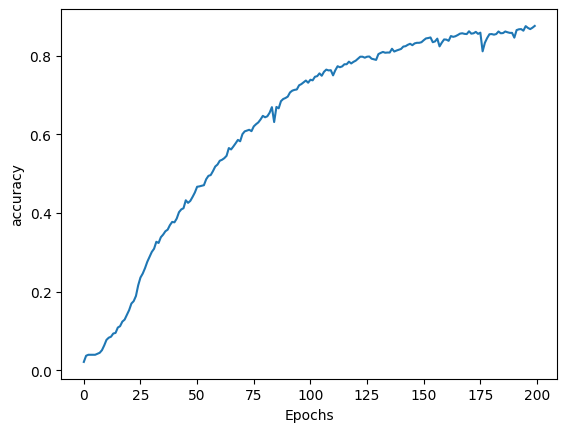

In [8]:
# view the training graph
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')

In [9]:
seed_text = "I'm feeling chills"
next_words = 100

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  predicted = np.argmax(model.predict(token_list), axis=-1)
  output_word = ''
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += ' ' + output_word
print(seed_text)

1/1 [==============================] - 0s 22ms/step
I'm feeling chills me sing and you and i morning your house cause i found out that what could i found could sure me strong found give what could i am not believe what a dreams you boomaboomerang its good as new before my last its crazy last take bang bang a boomaboomerang is love good as new dimension my god its not realized its good ground ground look found bang bang only realized only realized its realized its a boomaboomerang good as new dimension my god its good face its realized its no ground one take bang give time found realized song
